In [1]:
import numpy as np

In [2]:
repeats = 1000

sizes = [25, 10_000]

In [3]:
alpha = 0.05

In [4]:
lam = 1

### [Mean, Var](https://stats.stackexchange.com/questions/45124/central-limit-theorem-for-sample-medians)

### [Shorthand](https://stats.stackexchange.com/questions/107461/standard-error-on-median-for-exponential-distribution)

$(1) \ \sigma_{x}=\frac{1}{2\sqrt{N}f(\overline{x})}$ 
<br>
<br>
$\overline{x} = \frac{\log(2)}{\lambda} \Rightarrow f(\overline{x}) = \lambda e^{-\lambda \overline{x}} = \frac{\lambda}{2} \Rightarrow (1) \Rightarrow \sigma_{x}=\frac{1}{\lambda\sqrt{N}} = \frac{1}{\sqrt{N}}$

In [5]:
real_median = np.log(2) # Wiki + math

In [6]:
from collections import defaultdict
from scipy.stats import norm


results = defaultdict(int)
meds = defaultdict(list)

for size in sizes:
    for i in range(repeats):
        X = np.random.exponential(1 / lam, size)
        med_x = np.median(X)
        
        meds[(size, repeats)].append(med_x)
        
        sigma_interval = 1 / np.sqrt(size)
        
        lower = norm.ppf(alpha / 2, loc=med_x, scale=sigma_interval)
        upper = norm.ppf(1 - alpha / 2, loc=med_x, scale=sigma_interval)
        
        if lower <= real_median <= upper:
            results[(size, repeats)] += 1

In [7]:
for size in sizes:
    prob = results[(size, repeats)] / repeats
    print(f'{size=} {repeats=} {prob=}')

size=25 repeats=1000 prob=0.943
size=10000 repeats=1000 prob=0.95


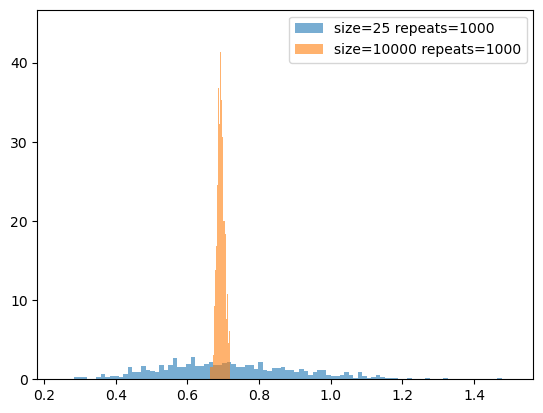

In [8]:
import matplotlib.pyplot as plt

for size in sizes:
    data = meds[(size, repeats)]
    plt.hist(data, bins=100, alpha=0.6, label=f'{size=} {repeats=}', density=True)
 
plt.legend()  
plt.show()

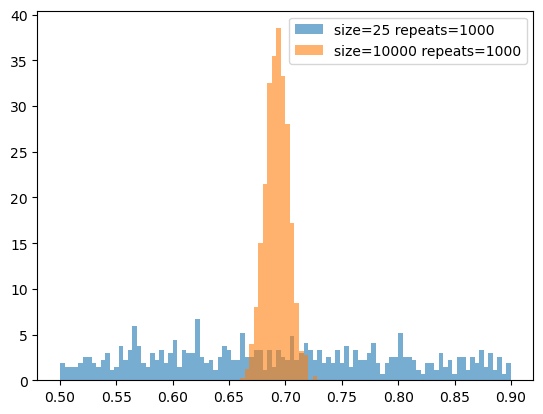

In [9]:
for size in sizes:
    data = meds[(size, repeats)]
    plt.hist(data, bins=100, alpha=0.6, label=f'{size=} {repeats=}', range=(0.5,  0.9), density=True)
 
plt.legend()  
plt.show()

### Здесь мы пользуемся как раз тем, что выборочная медиана следует за асимптотическим нормальным рапсределением со средним $\lambda^{-1} = 1$ и дисперсией $n^{-1}$

### Критическое z-значение для уровня $\alpha / 2$ может быть найдено из нормального распределения. 
### ($med_x - z_{\alpha / 2} \cdot \sqrt{\frac{1}{n}}, med_x + z_{\alpha / 2} \cdot \sqrt{\frac{1}{n}}$)
### Для 95% интервала необходимо найти $z_{0.025}$